In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time

In [2]:
iHerb = pd.read_csv('C:/Users\hp\SDAIA-Camp\iHerb.csv')
df = pd.read_csv('C:/Users\hp\SDAIA-Camp\iHerb_products.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

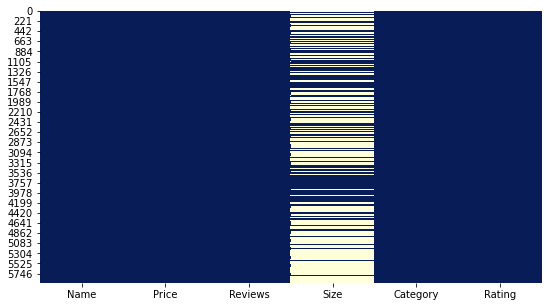

In [4]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")#check if there is any null values
plt.show()

In [5]:
df.dropna(inplace=True)

In [6]:
df.reset_index(drop=True,inplace=True)

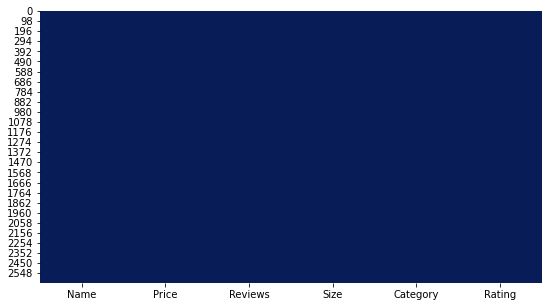

In [7]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")#check if there is any null values
plt.show()

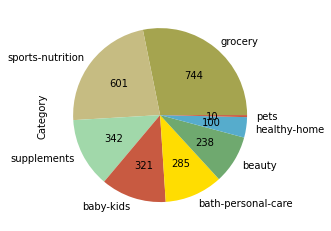

In [8]:
states = df['Category'].value_counts()
colors = ['#e91e63','#59dce2','#1982bc','#4caf50']
colors = ['#a5a44f', '#c6bc82', '#a1d8aa', '#c85a41','#ffdd01','#6fa96f','#56accc','#c85a41']
states.plot.pie(autopct=lambda x: '{:.0f}'.format(x*states.sum()/100), colors = colors )

In [9]:
df

,Name,Price,Reviews,Size,Category,Rating
0,"California Gold Nutrition, Gold C, Vitamin C, ...",5.45,121799.0,0.000,supplements,4.8
1,"California Gold Nutrition, CollagenUP, Marine ...",26.44,88657.0,206.000,supplements,4.7
2,"California Gold Nutrition, Gold C, Vitamin C, ...",14.00,8765.0,0.500,supplements,4.8
3,"21st Century, Magnesium, 250 mg, 110 Tablets",3.45,14589.0,0.250,supplements,4.6
4,"Now Foods, Iron, Double Strength, 36 mg, 90 Ve...",13.85,12121.0,0.036,supplements,4.8
...,...,...,...,...,...,...
2636,"Seventh Generation, Laundry Detergent Packs, C...",45.58,8.0,1500.000,healthy-home,4.5
2637,"Grab Green, Cookware & Bakeware Cleaner Pods, ...",7.78,71.0,210.000,healthy-home,4.4
2638,"29 St. Honore, Savon Parfume 1779, Roses & Bai...",8.40,45.0,135.000,healthy-home,4.3
2639,"Sai Baba, Super Hit Incense, 15 g",3.11,1390.0,15.000,healthy-home,4.5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2641 entries, 0 to 2640
Data columns (total 6 columns):
Name        2641 non-null object
Price       2641 non-null float64
Reviews     2641 non-null float64
Size        2641 non-null float64
Category    2641 non-null object
Rating      2641 non-null float64
dtypes: float64(4), object(2)
memory usage: 123.9+ KB


In [11]:
df_ = df['Category']

In [12]:
df_

0        supplements
1        supplements
2        supplements
3        supplements
4        supplements
            ...     
2636    healthy-home
2637    healthy-home
2638    healthy-home
2639    healthy-home
2640    healthy-home
Name: Category, Length: 2641, dtype: object

In [13]:
set(df_)

{'baby-kids',
 'bath-personal-care',
 'beauty',
 'grocery',
 'healthy-home',
 'pets',
 'sports-nutrition',
 'supplements'}

In [14]:
df_=pd.get_dummies(df_, drop_first=True,)

In [15]:
df_.shape

(2641, 7)

In [16]:
df_

,bath-personal-care,beauty,grocery,healthy-home,pets,sports-nutrition,supplements
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
2636,0,0,0,1,0,0,0
2637,0,0,0,1,0,0,0
2638,0,0,0,1,0,0,0
2639,0,0,0,1,0,0,0


In [17]:
#df.drop('Category',axis=1, inplace=True)

In [18]:
df

,Name,Price,Reviews,Size,Category,Rating
0,"California Gold Nutrition, Gold C, Vitamin C, ...",5.45,121799.0,0.000,supplements,4.8
1,"California Gold Nutrition, CollagenUP, Marine ...",26.44,88657.0,206.000,supplements,4.7
2,"California Gold Nutrition, Gold C, Vitamin C, ...",14.00,8765.0,0.500,supplements,4.8
3,"21st Century, Magnesium, 250 mg, 110 Tablets",3.45,14589.0,0.250,supplements,4.6
4,"Now Foods, Iron, Double Strength, 36 mg, 90 Ve...",13.85,12121.0,0.036,supplements,4.8
...,...,...,...,...,...,...
2636,"Seventh Generation, Laundry Detergent Packs, C...",45.58,8.0,1500.000,healthy-home,4.5
2637,"Grab Green, Cookware & Bakeware Cleaner Pods, ...",7.78,71.0,210.000,healthy-home,4.4
2638,"29 St. Honore, Savon Parfume 1779, Roses & Bai...",8.40,45.0,135.000,healthy-home,4.3
2639,"Sai Baba, Super Hit Incense, 15 g",3.11,1390.0,15.000,healthy-home,4.5


In [19]:
iHerb=pd.concat([df, df_],axis=1)

In [20]:
iHerb.to_csv('iHerb.csv',index=False)

In [21]:
iHerb2=iHerb.copy()

In [22]:
iHerb2

,Name,Price,Reviews,Size,Category,Rating,bath-personal-care,beauty,grocery,healthy-home,pets,sports-nutrition,supplements
0,"California Gold Nutrition, Gold C, Vitamin C, ...",5.45,121799.0,0.000,supplements,4.8,0,0,0,0,0,0,1
1,"California Gold Nutrition, CollagenUP, Marine ...",26.44,88657.0,206.000,supplements,4.7,0,0,0,0,0,0,1
2,"California Gold Nutrition, Gold C, Vitamin C, ...",14.00,8765.0,0.500,supplements,4.8,0,0,0,0,0,0,1
3,"21st Century, Magnesium, 250 mg, 110 Tablets",3.45,14589.0,0.250,supplements,4.6,0,0,0,0,0,0,1
4,"Now Foods, Iron, Double Strength, 36 mg, 90 Ve...",13.85,12121.0,0.036,supplements,4.8,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2636,"Seventh Generation, Laundry Detergent Packs, C...",45.58,8.0,1500.000,healthy-home,4.5,0,0,0,1,0,0,0
2637,"Grab Green, Cookware & Bakeware Cleaner Pods, ...",7.78,71.0,210.000,healthy-home,4.4,0,0,0,1,0,0,0
2638,"29 St. Honore, Savon Parfume 1779, Roses & Bai...",8.40,45.0,135.000,healthy-home,4.3,0,0,0,1,0,0,0
2639,"Sai Baba, Super Hit Incense, 15 g",3.11,1390.0,15.000,healthy-home,4.5,0,0,0,1,0,0,0


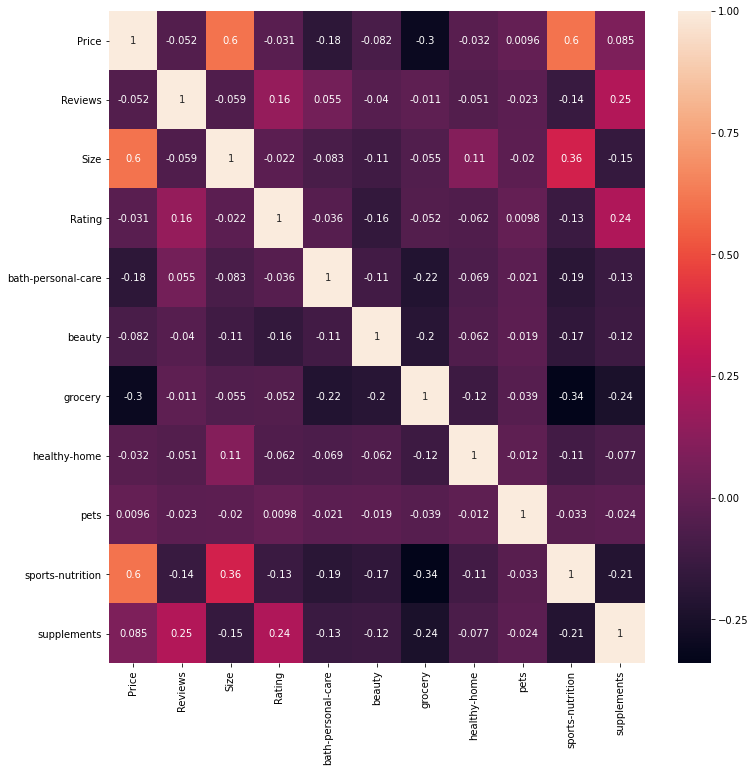

In [23]:
corr = iHerb[:1847].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot = True)

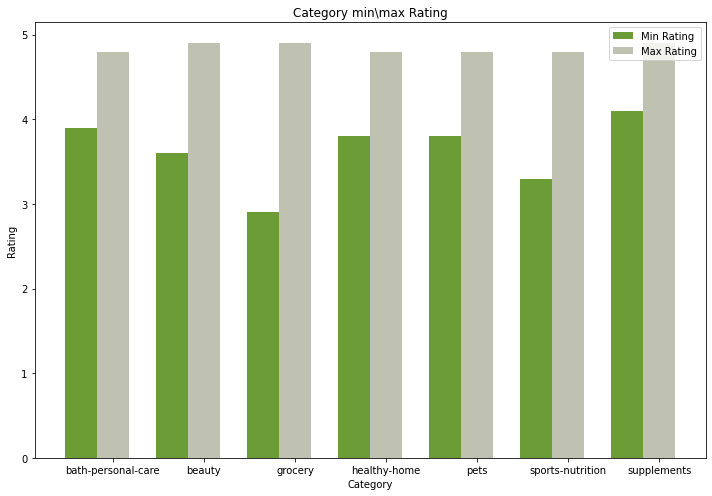

In [24]:
Categories=['bath-personal-care',
 'beauty',
 'grocery',
 'healthy-home',
 'pets',
 'sports-nutrition',
 'supplements']
Product_min_Rating=[]
Product_max_Rating=[]

for cate in Categories:
    Product_max_Rating.append(max(iHerb[iHerb['Category']== cate]['Rating']))
    Product_min_Rating.append(min(iHerb[iHerb['Category']== cate]['Rating']))
    
months = iHerb['Category']
n_groups = 7
means_frank = Product_min_Rating
means_guido = Product_max_Rating

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='#478402',
label='Min Rating')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='#b0b39d',
label='Max Rating')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Category min\max Rating')


plt.xticks(index + bar_width,Categories)

plt.legend()
plt.tight_layout()
plt.show()

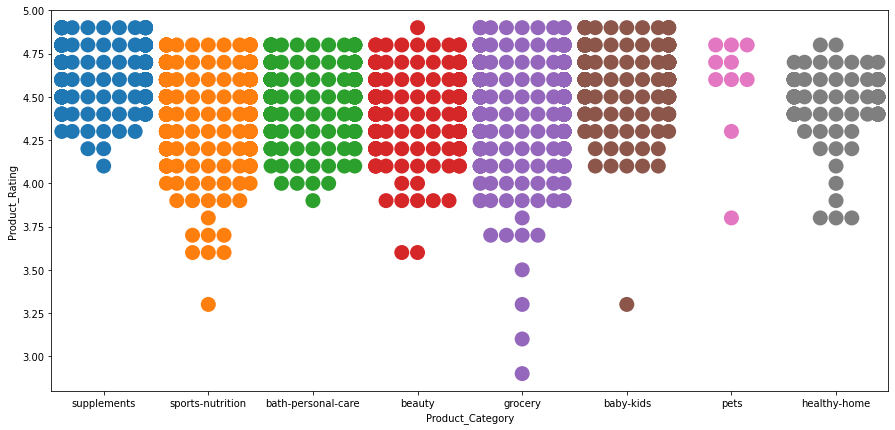

In [25]:
Product_Category=iHerb['Category']
Product_Rating=iHerb['Rating']
    
newData = pd.DataFrame({
    'Product_Category':Product_Category,
    'Product_Rating':Product_Rating
})
fig, ax = plt.subplots(figsize=(15,7))
sns.swarmplot(x="Product_Category", y="Product_Rating", data=newData,size=15)


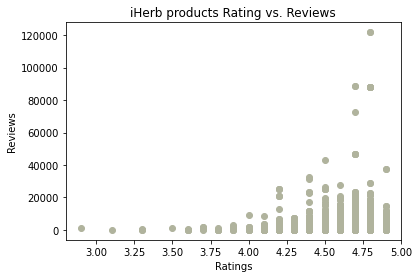

In [26]:
plt.scatter(iHerb['Rating'], iHerb['Reviews'], color = '#b0b39d')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('iHerb products Rating vs. Reviews')
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.show()

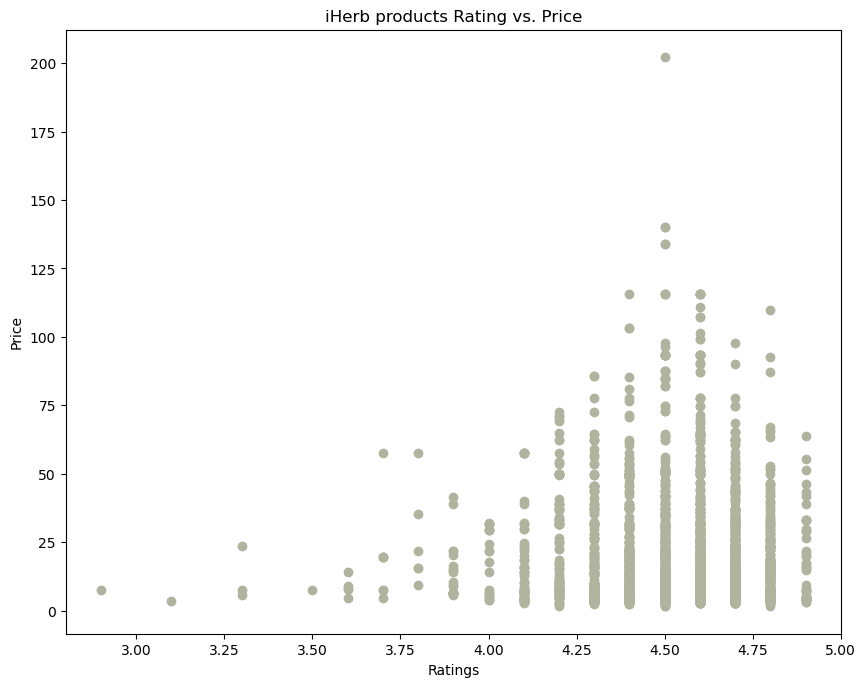

In [27]:
plt.scatter(iHerb['Rating'], iHerb['Price'], color = '#b0b39d')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('iHerb products Rating vs. Price')
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.show()

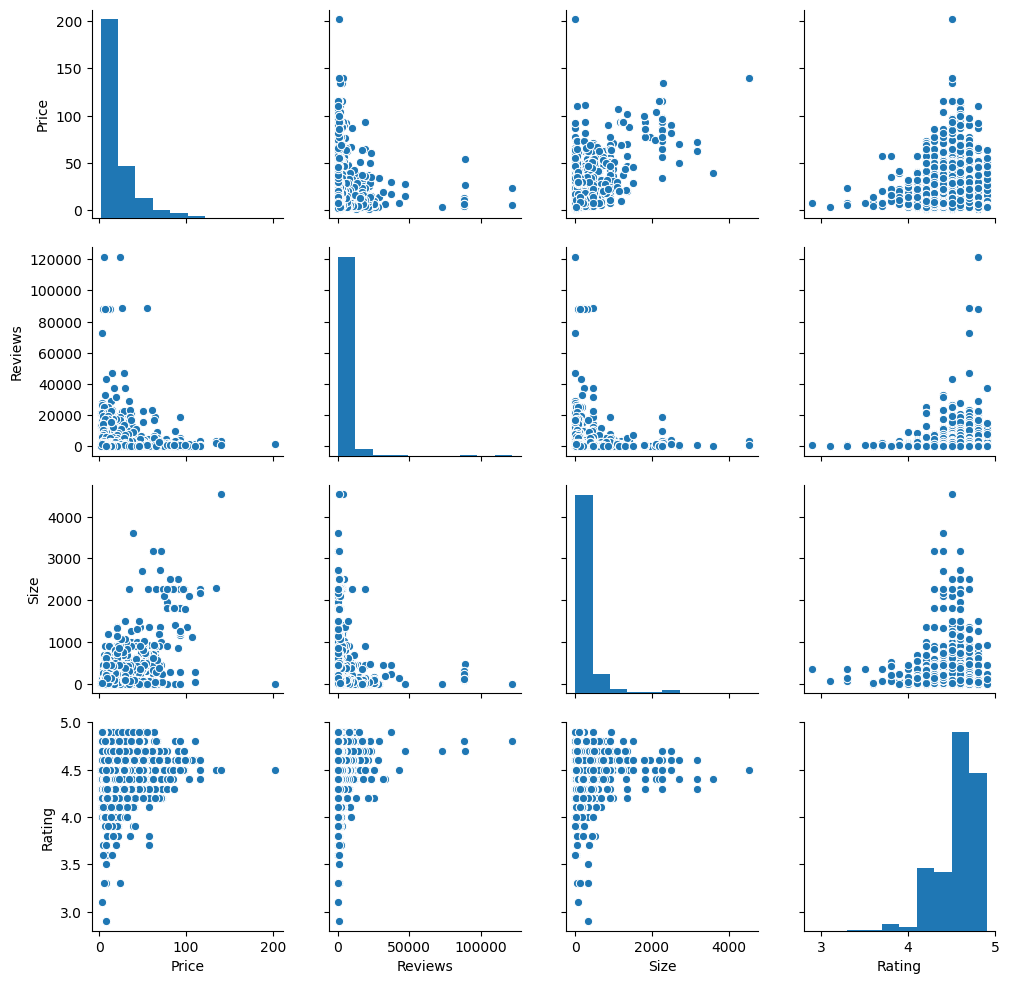

In [28]:
sns.pairplot(df)

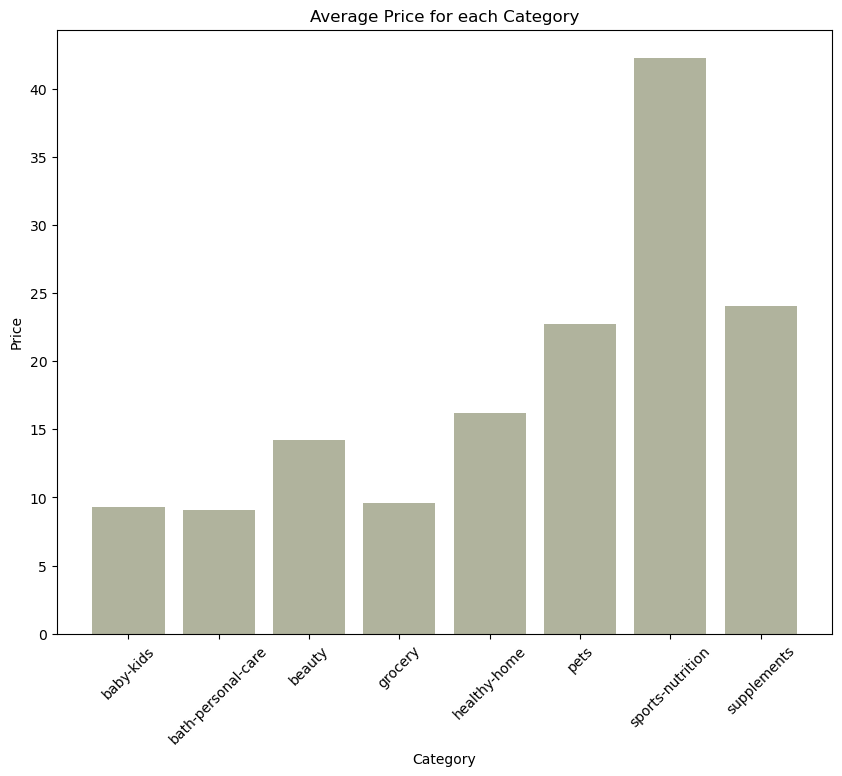

In [29]:
mean_OF_Price = df.groupby(['Category'])['Price'].mean().reset_index()
plt.bar(mean_OF_Price['Category'],mean_OF_Price['Price'],color = '#b0b39d')
plt.xticks(rotation=45);
plt.title('Average Price for each Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.savefig('Average.png')

In [29]:
df.describe()

,Price,Reviews,Size,Rating
count,2641.000000,2641.000000,2641.000000,2641.000000
mean,19.519345,2972.300644,219.787373,4.536350
std,20.446082,7411.845875,420.341065,0.212801
min,1.550000,2.000000,0.000000,2.900000
25%,6.220000,442.000000,22.000000,4.400000
50%,11.080000,1068.000000,80.000000,4.600000
75%,25.400000,2689.000000,227.000000,4.700000
max,202.200000,121799.000000,4540.000000,4.900000


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [31]:
iHerb.columns

Index(['Name', 'Price', 'Reviews', 'Size', 'Category', 'Rating',
       'bath-personal-care', 'beauty', 'grocery', 'healthy-home', 'pets',
       'sports-nutrition', 'supplements'],
      dtype='object')

In [32]:
X_train, X_test, y_train, y_test = train_test_split(iHerb[[ 'Rating', 'Reviews', 'Size', 
       'bath-personal-care', 'beauty', 'grocery', 'healthy-home', 'pets',
       'sports-nutrition', 'supplements']], iHerb[['Price']], test_size=0.3, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)



In [33]:
print("Training Data has",X_train.shape)
print("Testing Data has",X_test.shape)
print("Validation Data has",X_val.shape)

Training Data has (1293, 10)
Testing Data has (793, 10)
Validation Data has (555, 10)


In [34]:
list_models=[]
list_scores=[]
list_errors=[]
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_1=lr.predict(X_val)
score_1=r2_score(y_val,pred_1)
error_1=mean_squared_error(y_val,pred_1)
list_models.append('linear regression')
list_scores.append(score_1)
list_errors.append(error_1)
print("training accuracy: ",r2_score(y_train,lr.predict(X_train)) )
print("training error: ",1-r2_score(y_train,lr.predict(X_train)) )
print("testing accuracy: ",r2_score(y_val,lr.predict(X_val)) )
print("testing error: ",1-r2_score(y_val,lr.predict(X_val)) )

training accuracy:  0.5998162780437679
training error:  0.4001837219562321
testing accuracy:  0.5050522517376872
testing error:  0.4949477482623128


In [35]:
lr.coef_

array([[-1.28708327e+00, -6.41428968e-05,  2.39382820e-02,
        -1.78694367e+00,  6.20194043e+00, -2.70262164e+00,
        -1.80202499e+00,  1.33998175e+01,  2.26130017e+01,
         1.56547394e+01]])

In [36]:
lr.intercept_

array([13.72452975])

In [37]:
error_1*100

22772.050251209785

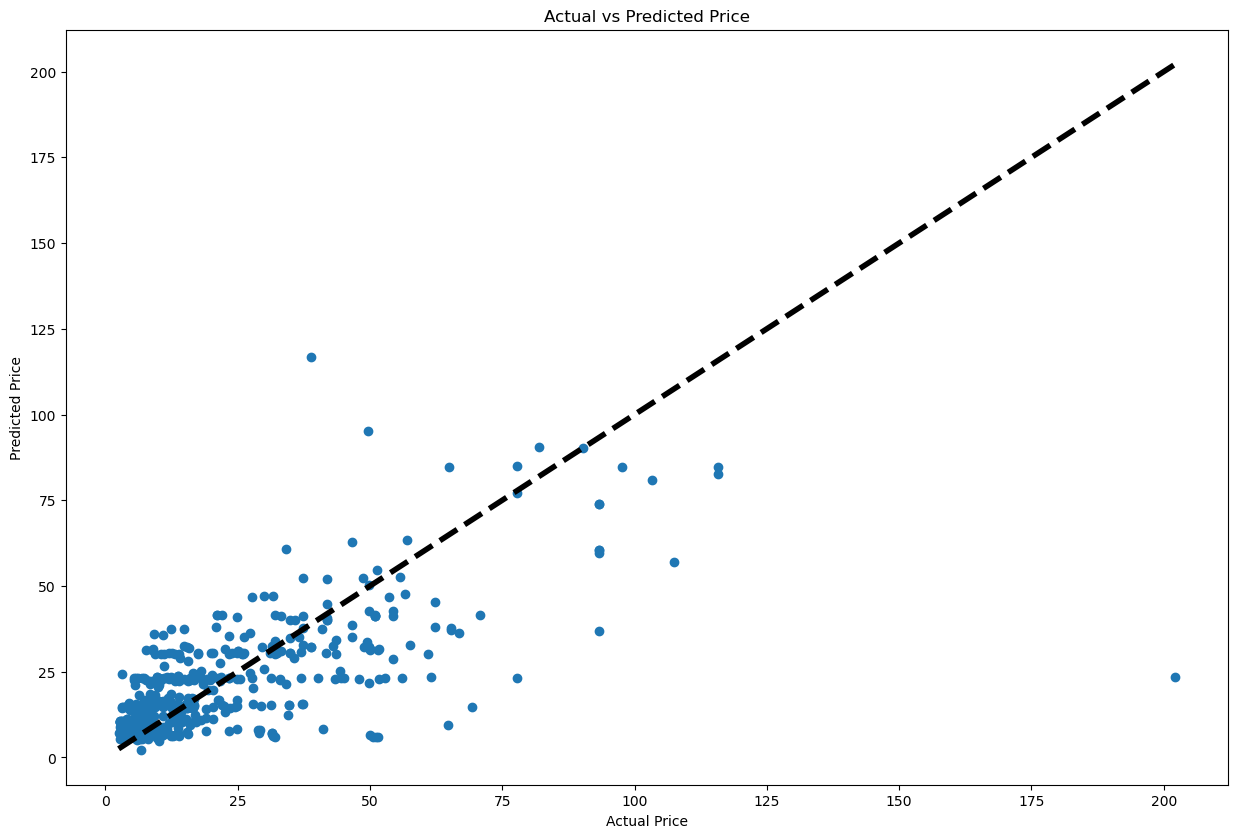

In [38]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(y_val, pred_1)
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
ax.set_title('Actual vs Predicted Price')
ax.set_xlabel('Actual Price')
ax.set_ylabel('Predicted Price')
plt.show()

In [39]:
iHerb.columns

Index(['Name', 'Price', 'Reviews', 'Size', 'Category', 'Rating',
       'bath-personal-care', 'beauty', 'grocery', 'healthy-home', 'pets',
       'sports-nutrition', 'supplements'],
      dtype='object')

In [40]:
iHerb.rename(columns={'bath-personal-care': 'bathAndPersonalAndCare', 'healthy-home': 'healthyHome', 'sports-nutrition':'sportsAndNutrition'}, inplace=True)

In [41]:
# fit model with target as housing price index
import statsmodels.api as sm

housing_model = sm.OLS(y_train, X_train, data=df)

results = housing_model.fit()

# summarize our model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.793
Model:                            OLS   Adj. R-squared (uncentered):              0.791
Method:                 Least Squares   F-statistic:                              490.1
Date:                Sat, 25 Sep 2021   Prob (F-statistic):                        0.00
Time:                        23:32:29   Log-Likelihood:                         -5120.5
No. Observations:                1293   AIC:                                  1.026e+04
Df Residuals:                    1283   BIC:                                  1.031e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Rating                 1.6268      0.221      7.378      0.000       1.194       2.059
Reviews            -7.164e-05   4.22e-05     -1.699      0.090      -0.000    1.11e-05
Size                   0.0239      0.001     24.315      0.000       0.022       0.026
bath-personal-care    -1.1684      1.439     -0.812      0.417      -3.992       1.655
beauty                 7.0196      1.564      4.489      0.000       3.952      10.087
grocery               -2.1260      1.197     -1.776      0.076      -4.474       0.222
healthy-home          -1.0430      2.136     -0.488      0.625      -5.233       3.147
pets                  13.4361      5.792      2.320      0.021       2.073      24.799
sports-nutrition      23.3393      1.276     18.284      0.000      20.835      25.843
supplements           15.8894      1.434     11.079      0.000      13.076      18.703
==============================================================================
Omnibus:                      498.908   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3248.219
Skew:                           1.646   Prob(JB):                         0.00
Kurtosis:                      10.032   Cond. No.                     1.53e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
import statsmodels.formula.api as smf
SMF_model = smf.ols('Price ~ Rating+ Reviews+Size + bathAndPersonalAndCare + beauty + grocery + healthyHome + pets + sportsAndNutrition + supplements', data=iHerb).fit()

In [43]:
print(SMF_model.rsquared)

0.6086905171550053


In [44]:
SMF_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     409.1
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:32:30   Log-Likelihood:                -10478.
No. Observations:                2641   AIC:                         2.098e+04
Df Residuals:                    2630   BIC:                         2.104e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 11.1335      5.920      1.881      0.060      -0.475      22.742
Rating                    -0.8332      1.265     -0.659      0.510      -3.314       1.648
Reviews                -5.025e-05   3.52e-05     -1.426      0.154      -0.000    1.88e-05
Size                       0.0232      0.001     35.681      0.000       0.022       0.024
bathAndPersonalAndCare    -0.8608      1.062     -0.811      0.418      -2.943       1.221
beauty                     5.3257      1.132      4.704      0.000       3.106       7.546
grocery                   -1.8369      0.876     -2.097      0.036      -3.555      -0.119
healthyHome               -1.5603      1.506     -1.036      0.300      -4.512       1.392
pets                      13.4001      4.117      3.255      0.001       5.328      21.472
sportsAndNutrition        23.3467      0.952     24.536      0.000      21.481      25.212
supplements               15.8286      1.016     15.577      0.000      13.836      17.821
==============================================================================
Omnibus:                     1561.977   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43495.226
Skew:                           2.290   Prob(JB):                         0.00
Kurtosis:                      22.347   Cond. No.                     1.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(X_train,y_train)
pred_2=rfg.predict(X_val)
score_2=r2_score(y_val,pred_2)
error_2=mean_squared_error(y_val,pred_2)
list_models.append('randomforest')
list_scores.append(score_2)
list_errors.append(error_2)
print("training accuracy: ",r2_score(y_train,lr.predict(X_train)) )
print("training error: ",1-r2_score(y_train,lr.predict(X_train)) )
print("testing accuracy: ",r2_score(y_val,lr.predict(X_val)) )
print("testing error: ",1-r2_score(y_val,lr.predict(X_val)) )

training accuracy:  0.5998162780437679
training error:  0.4001837219562321
testing accuracy:  0.5050522517376872
testing error:  0.4949477482623128


In [46]:
X_train, X_test, y_train, y_test = train_test_split(iHerb[[ 'Rating', 'Reviews', 'Size', 
       'bathAndPersonalAndCare', 'beauty', 'grocery', 'healthyHome', 'pets',
       'sportsAndNutrition', 'supplements']], iHerb[['Price']], test_size=0.3, random_state=42)

In [47]:
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=5)
scores.mean()

0.5615112257105525

In [48]:
#Before Feature selection 
lm.fit(X_train,y_train)
pred_1=lm.predict(X_test)
score_1=r2_score(y_test,pred_1)
error_1=mean_squared_error(y_test,pred_1)
list_models.append('linear regression')
list_scores.append(score_1)
list_errors.append(error_1)
print("training accuracy: ",r2_score(y_train,lm.predict(X_train)) )
print("training error: ",1-r2_score(y_train,lm.predict(X_train)) )
print("testing accuracy: ",r2_score(y_test,lm.predict(X_test)) )
print("testing error: ",1-r2_score(y_test,lm.predict(X_test)) )

training accuracy:  0.5696640032918073
training error:  0.43033599670819267
testing accuracy:  0.6977738878683559
testing error:  0.3022261121316441


# Features Selection by Lasso

### Choose labmda value

In [49]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score

In [50]:
lambdas = (0.001,0.01,0.02,0.03,0.04, 0.1, 0.5, 1, 2, 10)
l_num = 10
pred_num = X_train.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

In [51]:
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_val, y_val)

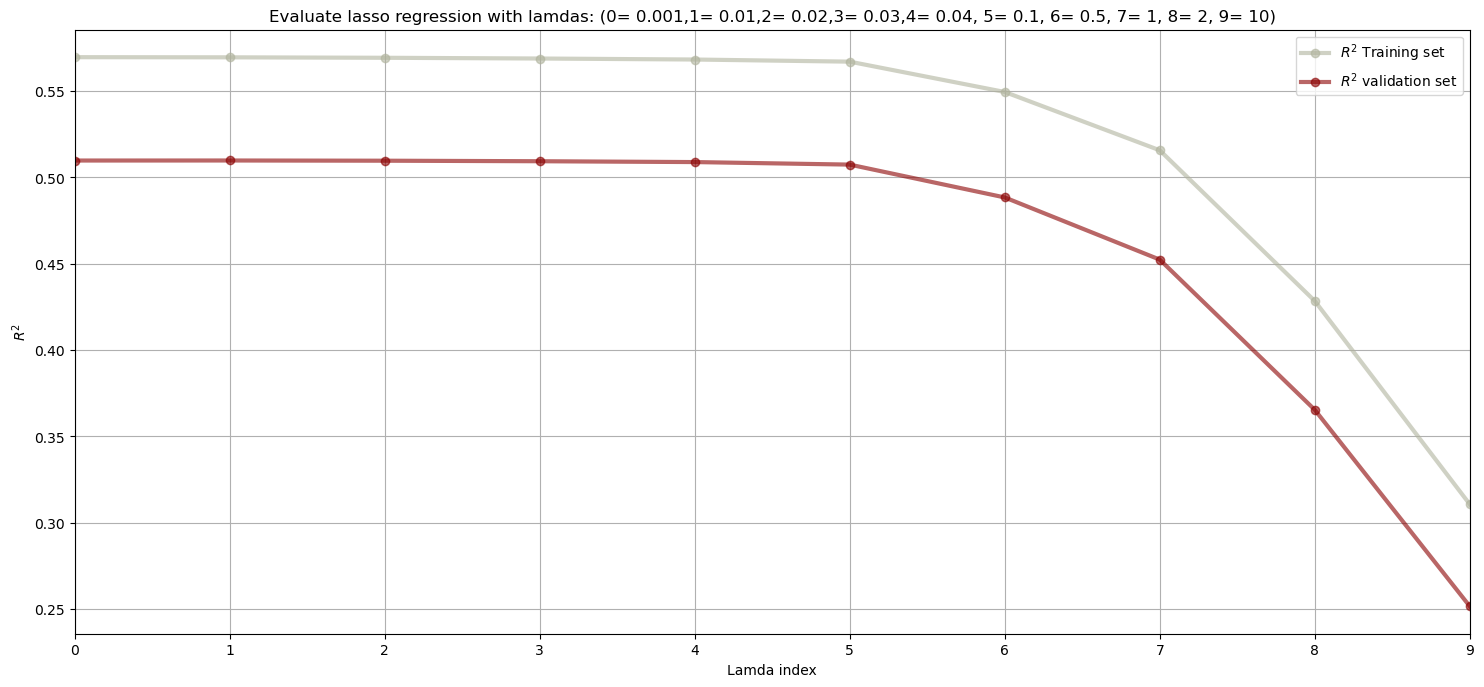

In [52]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="#b0b39d", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ validation set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 9)
plt.title(r'Evaluate lasso regression with lamdas: (0= 0.001,1= 0.01,2= 0.02,3= 0.03,4= 0.04, 5= 0.1, 6= 0.5, 7= 1, 8= 2, 9= 10)')#edit
plt.legend(loc='best')
plt.grid()

choose labmda  = 0.03

In [53]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [54]:
# This is the best alpha value it found - not far from the value
# selected using simple validation
lasso_model.alpha_

0.03331294787934674

In [55]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [56]:
columns_names = X_train.columns
columns_names

Index(['Rating', 'Reviews', 'Size', 'bathAndPersonalAndCare', 'beauty',
       'grocery', 'healthyHome', 'pets', 'sportsAndNutrition', 'supplements'],
      dtype='object')

In [57]:


clf = Lasso(alpha=0.03)
clf.fit(X_train, y_train)

Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
coeff = clf.coef_
coeff

array([-4.30698872e-01, -6.58516077e-05,  2.38954314e-02, -1.65600020e+00,
        5.77178902e+00, -2.73610420e+00, -1.03921567e+00,  5.34272086e+00,
        2.23926423e+01,  1.51825997e+01])

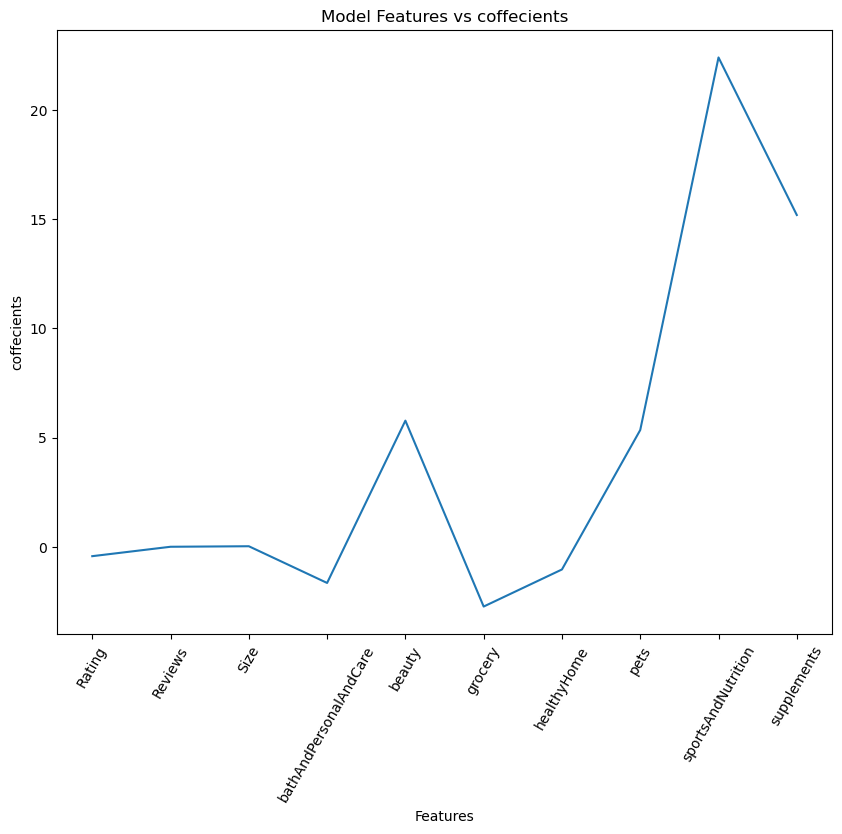

In [59]:
plt.plot(range(len(columns_names)), coeff)
plt.xticks(range(len(columns_names)),columns_names, rotation =60)
plt.ylabel('coffecients')
plt.xlabel('Features')
plt.title('Model Features vs coffecients')
plt.savefig('Model Features vs coffecients.png')

In [60]:
val_set_pred = clf.predict(X_val.loc[:,columns_names])

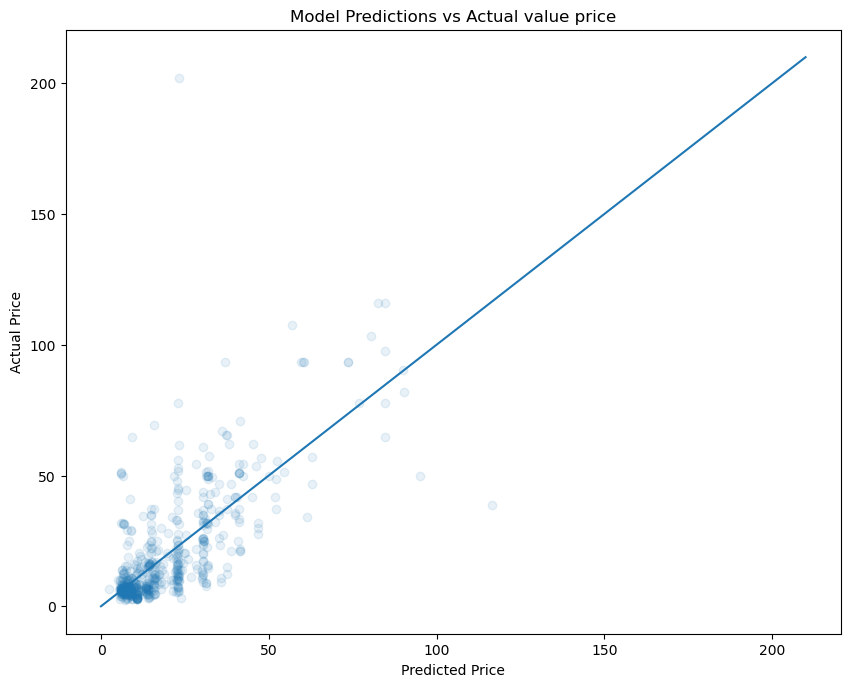

In [61]:
plt.scatter(val_set_pred, y_val, alpha=.1)
plt.plot(np.linspace(0,210,50), np.linspace(0,210,50))
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Model Predictions vs Actual value price')
plt.savefig('ModelPredictionsVSActual1.png')

In [62]:
r2_score(y_val, val_set_pred)

0.504842676555342

In [63]:
print('Lasso Regression: R^2 score on training set', clf.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on validation set', clf.score(X_val, y_val)*100)

Lasso Regression: R^2 score on training set 59.90028451650888
Lasso Regression: R^2 score on validation set 50.4842676555342


## Select high coffecients features only


In [64]:
columns_names = X_train.columns.drop(['Rating','Size', 'Reviews', 'bathAndPersonalAndCare','grocery', 'healthyHome'])
columns_names

Index(['beauty', 'pets', 'sportsAndNutrition', 'supplements'], dtype='object')

In [65]:
clf = Lasso(alpha=0.03)
clf.fit(X_train.loc[:,columns_names], y_train)

Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
coeff = clf.coef_
coeff

array([ 5.58829816,  5.63439868, 31.14864954, 14.598345  ])

In [67]:
val_set_pred = clf.predict(X_val.loc[:,columns_names])

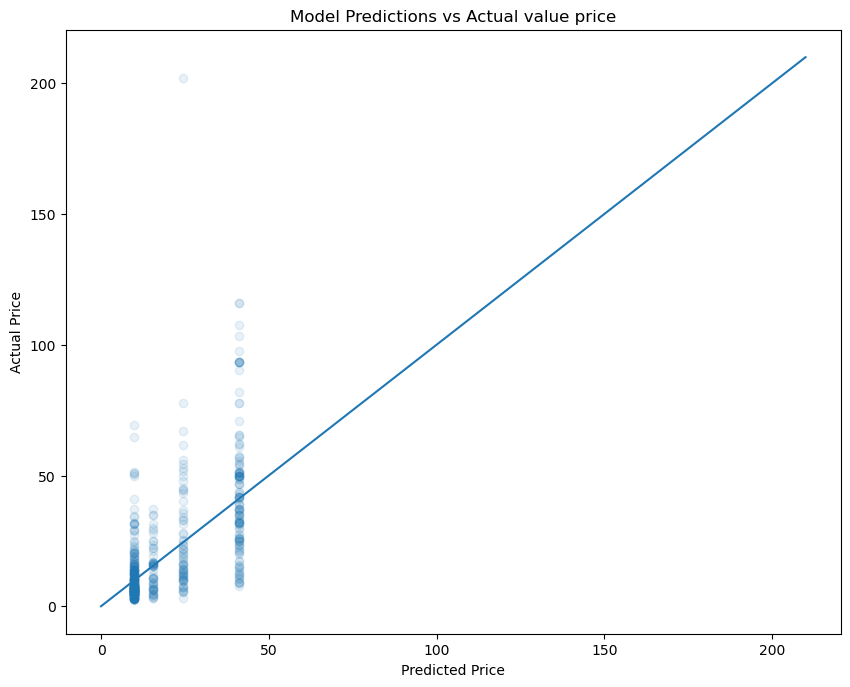

In [68]:
plt.scatter(val_set_pred, y_val, alpha=.1)
plt.plot(np.linspace(0,210,50), np.linspace(0,210,50))
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Model Predictions vs Actual value price')
plt.savefig('ModelPredictionsVSActual2.png')

In [69]:
r2_score(y_val, val_set_pred)

0.3790861204844015

In [70]:
print('Lasso Regression: R^2 score on training set', clf.score(X_train.loc[:,columns_names], y_train)*100)
print('Lasso Regression: R^2 score on validation set', clf.score(X_val.loc[:,columns_names], y_val)*100)

Lasso Regression: R^2 score on training set 40.97428479045418
Lasso Regression: R^2 score on validation set 37.90861204844015


## Select high coffecients and high correlation features

In [71]:
columns_names = X_train.columns.drop(['Rating', 'Reviews', 'bathAndPersonalAndCare','grocery', 'healthyHome'])
columns_names

Index(['Size', 'beauty', 'pets', 'sportsAndNutrition', 'supplements'], dtype='object')

In [72]:
clf = Lasso(alpha=0.03)
clf.fit(X_train.loc[:,columns_names], y_train)

Lasso(alpha=0.03, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [73]:
coeff = clf.coef_
coeff

array([2.37821154e-02, 7.66133548e+00, 7.26427837e+00, 2.43914143e+01,
       1.65697557e+01])

In [74]:
val_set_pred = clf.predict(X_val.loc[:,columns_names])

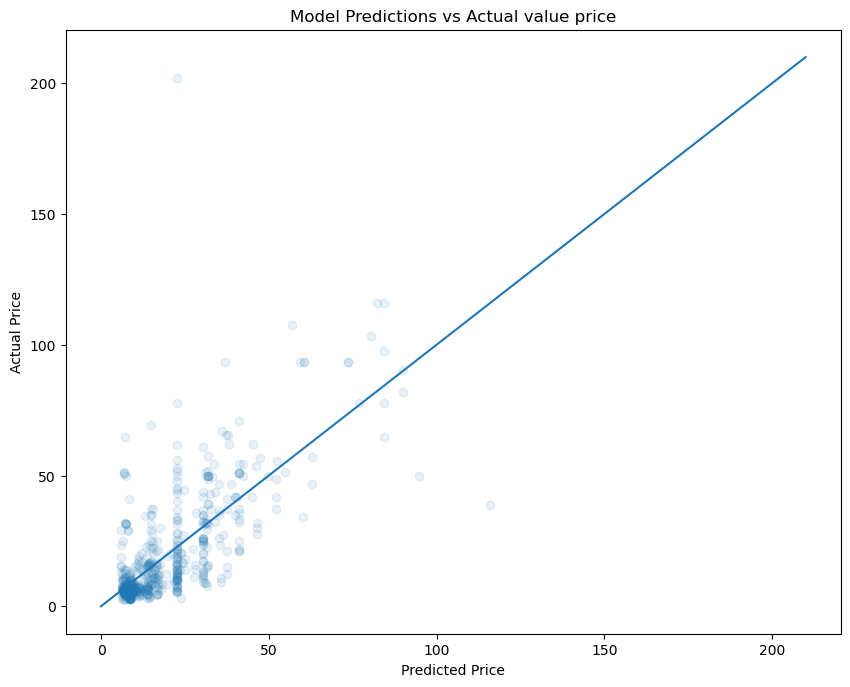

In [75]:
plt.scatter(val_set_pred, y_val, alpha=.1)
plt.plot(np.linspace(0,210,50), np.linspace(0,210,50))
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Model Predictions vs Actual value price')
plt.savefig('ModelPredictionsVSActual3.png')

In [76]:
r2_score(y_val, val_set_pred)

0.5058281813689178

In [77]:
print('Lasso Regression: R^2 score on training set', clf.score(X_train.loc[:,columns_names], y_train)*100)
print('Lasso Regression: R^2 score on validation set', clf.score(X_val.loc[:,columns_names], y_val)*100)

Lasso Regression: R^2 score on training set 59.66988711492256
Lasso Regression: R^2 score on validation set 50.58281813689178


In [78]:
X_train, X_test, y_train, y_test = train_test_split(iHerb[[ 'Size', 'beauty','pets','sportsAndNutrition', 'supplements']], iHerb[['Price']], test_size=0.3, random_state=42)

In [79]:
import statsmodels.api as sm
import statsmodels.formula.api as smf 

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     484.8
Date:                Sat, 25 Sep 2021   Prob (F-statistic):               0.00
Time:                        23:32:35   Log-Likelihood:                -7426.3
No. Observations:                1848   AIC:                         1.486e+04
Df Residuals:                    1842   BIC:                         1.490e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  6.0472      0.446     13.556      0.000       5.172       6.922
Size                   0.0226      0.001     26.737      0.000       0.021       0.024
beauty                 7.7573      1.144      6.783      0.000       5.514      10.000
pets                  13.7981      5.113      2.699      0.007       3.770      23.826
sportsAndNutrition    25.1493      0.819     30.710      0.000      23.543      26.755
supplements           17.7530      0.972     18.274      0.000      15.848      19.658
==============================================================================
Omnibus:                     1185.330   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37125.280
Skew:                           2.510   Prob(JB):                         0.00
Kurtosis:                      24.376   Cond. No.                     7.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_1=lr.predict(X_test)
score_1=r2_score(y_test,pred_1)
error_1=mean_squared_error(y_test,pred_1)
print("training accuracy: ",r2_score(y_train,lr.predict(X_train)) )
print("training error: ",1-r2_score(y_train,lr.predict(X_train)) )
print("testing accuracy: ",r2_score(y_test,lr.predict(X_test)) )
print("testing error: ",1-r2_score(y_test,lr.predict(X_test)) )

training accuracy:  0.5681969496288815
training error:  0.43180305037111855
testing accuracy:  0.6982268701009542
testing error:  0.3017731298990458


# Assumptions 

# Assumption 1: regression is linear in parameters and correctly specified


# Assumption 2: residuals ( ${e_i} = Y_i-\hat{Y}_i$ ) should be normally distributed with zero mean


In [74]:
X_train, X_test, y_train, y_test = train_test_split(iHerb[[ 'Size', 'beauty','sportsAndNutrition', 'supplements','pets']], iHerb[['Price']], test_size=0.3, random_state=42)

In [82]:
X_train.columns

Index(['Size', 'beauty', 'sportsAndNutrition', 'supplements'], dtype='object')

In [76]:
cols = ['Size', 'beauty','sportsAndNutrition', 'supplements','pets']
X = X_train[cols]
y = y_train.Price   # predictor
X.shape

(1848, 5)

In [77]:
lr = LinearRegression()
fit = lr.fit(X,y)

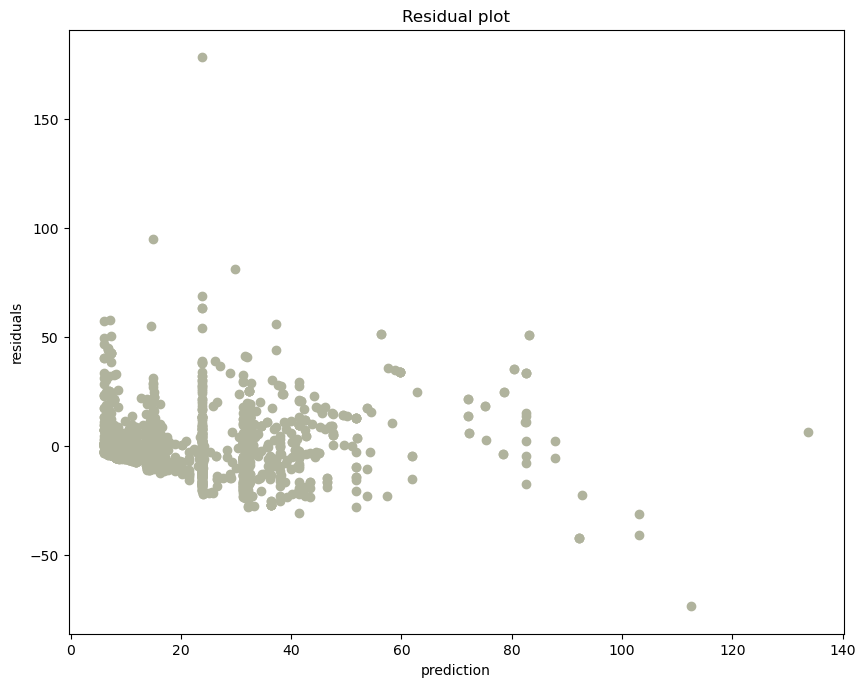

In [78]:
pred = lr.predict(X)
res = y - pred
plt.scatter(pred, res,color = '#b0b39d') # "scatter supposed to have no pattern"
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals")
plt.savefig("Residual.png")

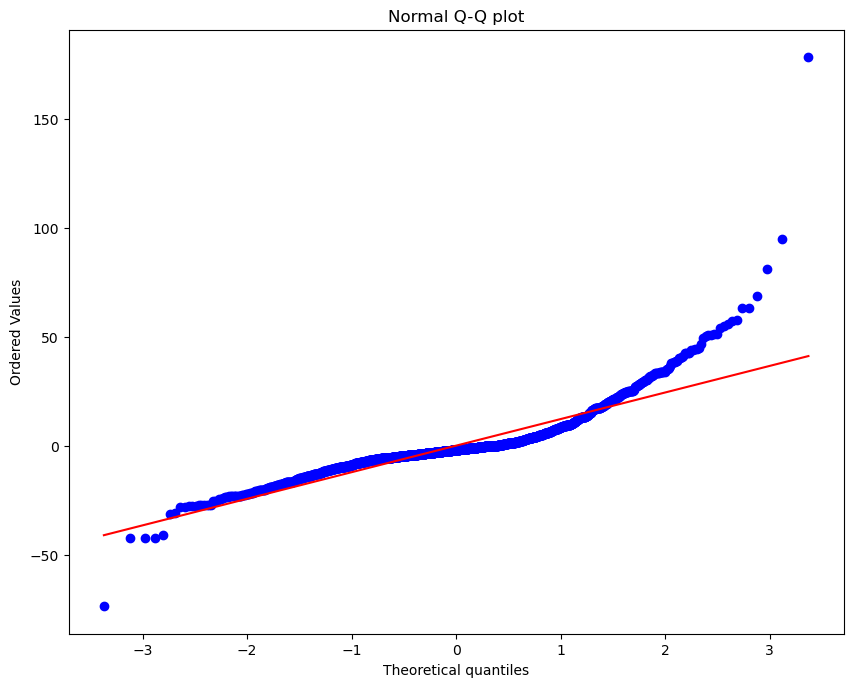

In [79]:
resSeries = res.squeeze()
stats.probplot(resSeries, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.savefig('qqplot.png')
plt.show()

# Assumption 3: error terms must have constant variance

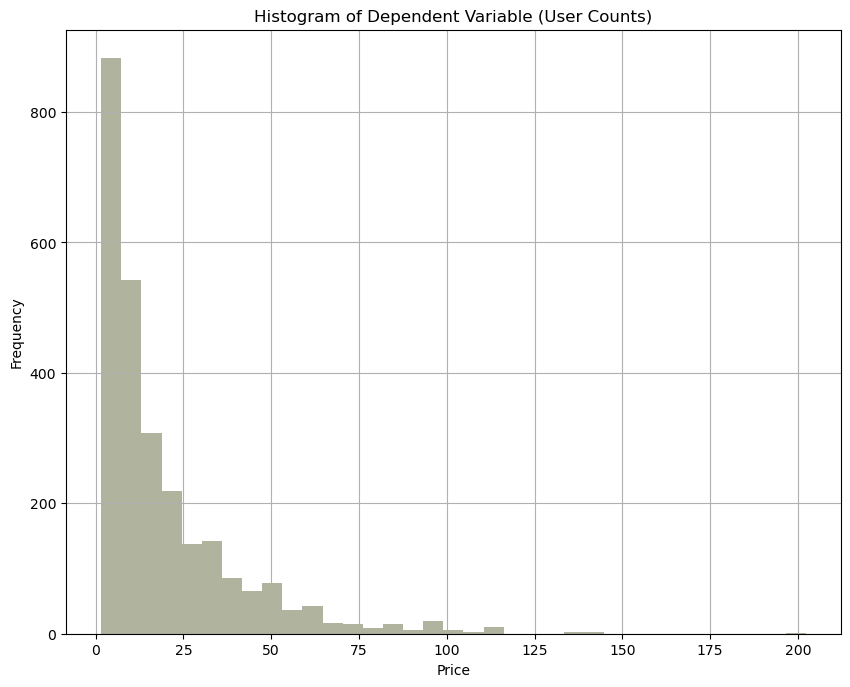

In [80]:
iHerb.Price.hist(bins=35,color = '#b0b39d')
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title('Histogram of Dependent Variable (User Counts)');
plt.savefig('Price.png')

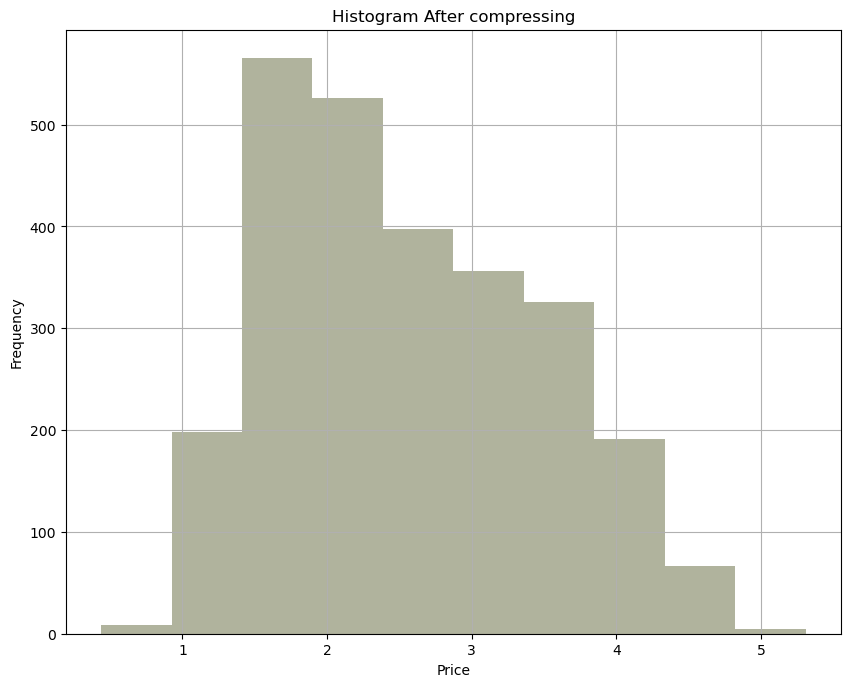

In [81]:
np.log(iHerb.Price).hist(color = '#b0b39d');
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title('Histogram After compressing');
plt.savefig('Price2.png')